# Bølgeformer som rekker

<div class="alert alert-block alert-info">
<b>Anbefalte forkunnskaper:</b> Rekker, trigonometriske funksjoner (sinus), python-funksjoner.
</div>

I de tidligere Notebookene har vi brukt tre ulike bølgeformer: sinus, sagtann og trekant. Sinusbølgen laget vi ved hjelp av sinus-funksjonen fra `numpy` og vi brukte `signal.sawtooth` fra `scipy` for å lage sagtann- og trekantbølger. Det som er interessant er at hvis vi legger sammen mange nok sinusbølger (med bestemte frekvenser) oppstår andre bølgeformer! Her skal vi se på hvordan lage firkantbølgen og sagtannbølgen ved å legge sammen mange sinustoner. Vi skal gjøre det ved hjelp av rekker.

In [1]:
# Evaluer først denne

from startscript import *

%matplotlib inline

## "Hjemmelaget" firkantbølge

[Kilde](https://en.wikipedia.org/wiki/Square_wave)

En firkantbølge kan matematisk defineres som en rekke:

$x_{firkant}(t) = \frac{4}{\pi} \sum_{k=1}^{\infty} \frac{\sin{(2\pi (2k - 1)ft)}}{2k - 1} $

Siden en rekke er uendelig lang kan altså datamaskinen ikke gjøre en helt presis beregning (det hadde tatt uendelig med tid!). Men vi kan gjøre noe som kommer nært nok for vårt bruksområde, vi beregner altså ikke $\infty$, men $K$ antall ledd.

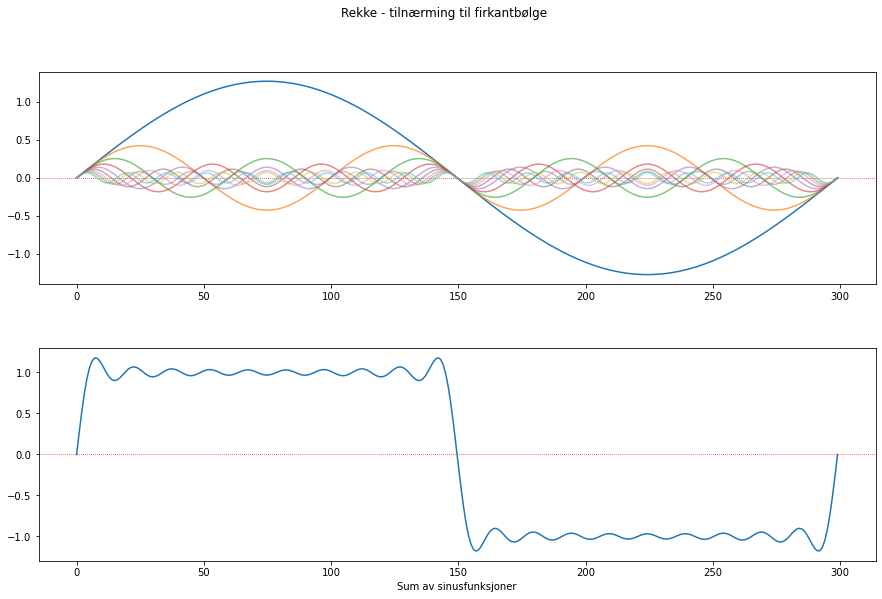

In [52]:
redusert_rate = 300  # Bruker redusert rate her for at plottingen skal kjøre raskere
frekvens = 1
amplitude = 1
K = 10   # Antall ledd i rekken. Forsøk å endre på denne.
varighet = 1

def ledd_firkant(k, frekvens, varighet):
    # funksjonsnavnet 'ledd' kommer av at vi skal bruke outputen som ledd i en rekke
    t = linspace(0., varighet, int(varighet * redusert_rate))
    return 4/pi * (sin(2 * pi * (2*k - 1) * frekvens * t) / (2*k - 1))    

def beregn_sum_firkant(K, frekvens, varighet, amplitude):
    rekke = zeros(int(varighet * redusert_rate))
    for k in range(1, K+1):
        rekke += ledd_firkant(k, frekvens, varighet) * amplitude
    return rekke



# ------------------------------------------------------------
# Kode for å plotte grafen:
def plott_sum_firkant(K):
    rekke = beregn_sum_firkant(K, frekvens, varighet, amplitude)
    axs[1].axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
    x = arange(0, antall_samples)
    plot(x, rekke[0:antall_samples])

antall_samples = int(varighet * redusert_rate)

fig, axs = subplots(2)
fig.suptitle("Rekke - tilnærming til firkantbølge")
axs[1].set_xlabel("Sum av sinusfunksjoner")
fig.set_figwidth(15)
fig.set_figheight(9)
subplots_adjust(hspace=0.3)
axs[0].axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
for k in range(1, K+1):
    transparency = 0.4 + (0.6 / k)   # Alpha fra 0.4-1.0
    axs[0].plot(ledd_firkant(k, frekvens, varighet),alpha=transparency)
plott_sum_firkant(K)
show()

### Prøv selv

In [33]:
# Kjør denne kodensnutten for å interaktivt endre antall ledd i rekken! Se hva som skjer med bølgen.

interact(plott_sum_firkant, K=(1,50))

interactive(children=(IntSlider(value=25, description='K', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plott_sum_firkant(K)>

In [31]:
# Spill av bølgen. Test med ulike verdier for K og hør hvordan lyden endrer seg.

frekvens = 440   # Test med ulike frekvenser
amplitude = 1
K = 2            # ... og test med forskjellige verdier for K
varighet = 2

def ledd_firkant_lyd(k, frekvens, varighet):
    t = linspace(0., varighet, int(varighet * rate))  # bruker her sampleraten (48000)
    return 4/pi * (sin(2 * pi * (2*k - 1) * frekvens * t) / (2*k - 1))    

def beregn_sum_firkant_lyd(K, frekvens, varighet, amplitude):
    rekke = zeros(int(varighet * rate))
    for k in range(1, K+1):
        rekke += ledd_firkant_lyd(k, frekvens, varighet) * amplitude
    return rekke

spill_av(beregn_sum_firkant_lyd(K, frekvens, varighet, amplitude))

## "Hjemmelaget" sagtannbølge

[Kilde](#https://en.wikipedia.org/wiki/Sawtooth_wave)

En sagtannbølge kan matematisk defineres som en rekke

$x_{sagtann}(t) = a \Big ( \frac{1}{2} - \frac{1}{\pi} \sum_{k=1}^{\infty} (-1)^{k}\frac{\sin{(2\pi k f t)}}{k} \Big)$

$a$ er amplitude, $f$ er fundamentalfrekvensen.
Her også gjør vi en tilnærming og beregner $K$ antall ledd.

Merk at $x_{sagtann}$ vil befinne seg (cirka) i intervallet $[0, 1]$. I koden under gjør vi noen endringer slik at signalet befinner seg (cirka) i intervallet $[-1, 1]$

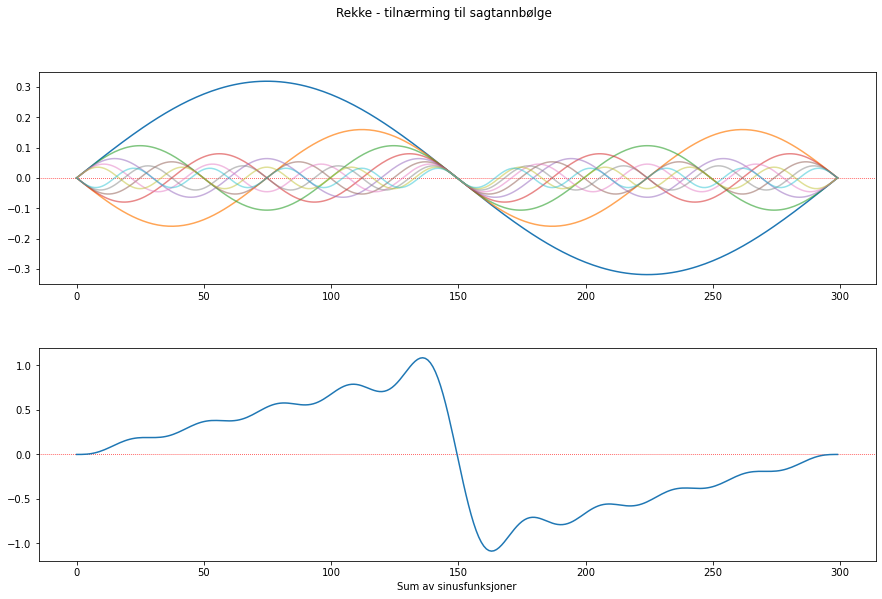

In [4]:
redusert_rate = 300  # Bruker redusert rate her for at plottingen skal kjøre raskere
frekvens = 1
amplitude = 1
K = 10   # Antall ledd i rekken. Forsøk å endre på denne og evaluer på nytt.
varighet = 1

def ledd_sagtann(k, frekvens, varighet):
    # funksjonsnavnet 'ledd' kommer av at vi skal bruke outputen som ledd i en rekke
    t = linspace(0., varighet, int(varighet * redusert_rate))
    return - (-1)**k * (sin(2 * pi * k * frekvens * t) / (pi*k))    

def beregn_sum_sagtann(K, frekvens, varighet, amplitude):
    rekke = zeros(int(varighet * redusert_rate))
    for k in range(1, K+1):
        # Multipliserer med 2 for at signalet skal være intervallet [-1, 1]
        rekke += ledd_sagtann(k, frekvens, varighet) * 2 * amplitude
    return rekke


# ------------------------------------------------------------
# Kode for å plotte grafen:
def plott_sum_sagtann(K):
    rekke = beregn_sum_sagtann(K, frekvens, varighet, amplitude)
    axs[1].axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
    x = arange(0, antall_samples)
    plot(x, rekke[0:antall_samples])

antall_samples = int(varighet * redusert_rate)

fig, axs = subplots(2)
fig.suptitle("Rekke - tilnærming til sagtannbølge")
axs[1].set_xlabel("Sum av sinusfunksjoner")
fig.set_figwidth(15)
fig.set_figheight(9)
subplots_adjust(hspace=0.3)
axs[0].axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
for k in range(1, K+1):
    transparency = 0.4 + (0.6 / k)   # Alpha fra 0.4-1.0
    axs[0].plot(ledd_sagtann(k, frekvens, varighet),alpha=transparency)
plott_sum_sagtann(K)
show()

### Prøv selv

In [5]:
# Kjør denne kodensnutten for å interaktivt endre antall ledd i rekken! Se hva som skjer med bølgen.

interact(plott_sum_sagtann, K=(1,50))

interactive(children=(IntSlider(value=25, description='K', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plott_sum_sagtann(K)>

In [16]:
# Spill av bølgen. Test med ulike verdier for K og hør hvordan lyden endrer seg.

frekvens = 440     # Test med ulike frekvenser
amplitude = 1
K = 10   # ... og test med forskjellige verdier for K
varighet = 2

def ledd_sagtann_lyd(k, frekvens, varighet):
    t = linspace(0., varighet, int(varighet * rate))  # bruker her sampleraten (48000)
    return - (-1)**k * (sin(2 * pi * k * frekvens * t) / (pi*k))    

def beregn_sum_sagtann_lyd(K, frekvens, varighet, amplitude):
    rekke = zeros(int(varighet * rate))
    for k in range(1, K+1):
        # Multipliserer med 2 for at signalet skal være intervallet [-1, 1]
        rekke += ledd_sagtann_lyd(k, frekvens, varighet) * 2 * amplitude
    return rekke

spill_av(beregn_sum_sagtann_lyd(K, frekvens, varighet, amplitude))